In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_train.csv')

In [40]:
df.shape

(891, 12)

In [41]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


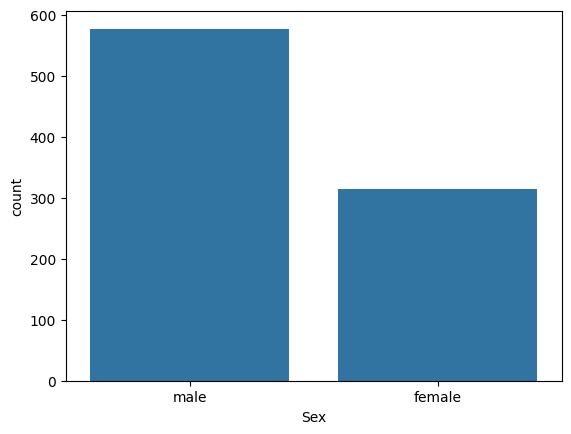

In [45]:
sns.countplot(x='Sex',data=df)
plt.show()

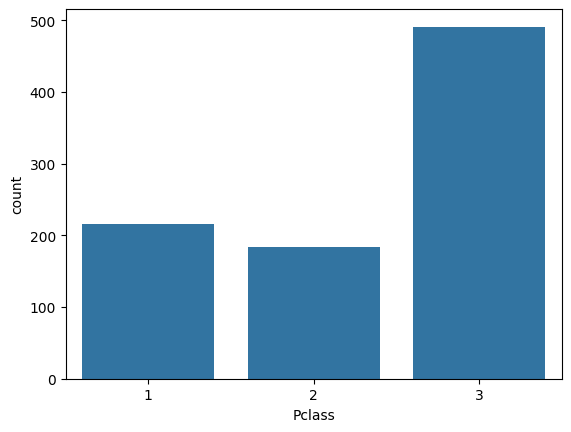

In [46]:
sns.countplot(x='Pclass', data = df)
plt.show()

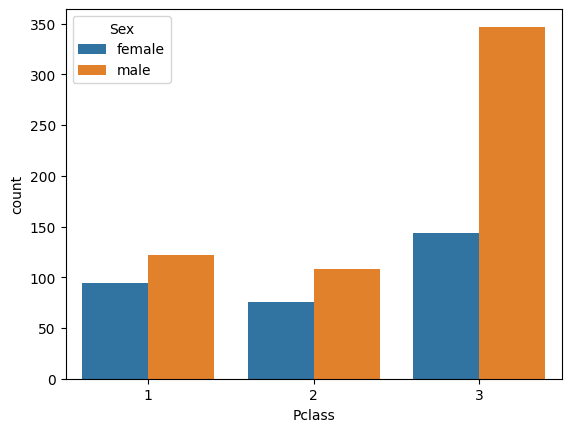

In [47]:
sns.countplot(x='Pclass', data = df, hue='Sex')
plt.show()

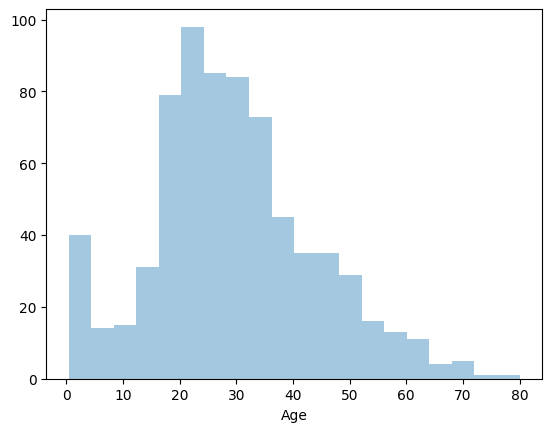

In [48]:
sns.distplot(df['Age'], kde=False, bins=20)
plt.show()

In [49]:
df['Along'] = df['SibSp']+df['Parch']

In [50]:
df['Along'].loc[df['Along']>0] = 1

In [51]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Along
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


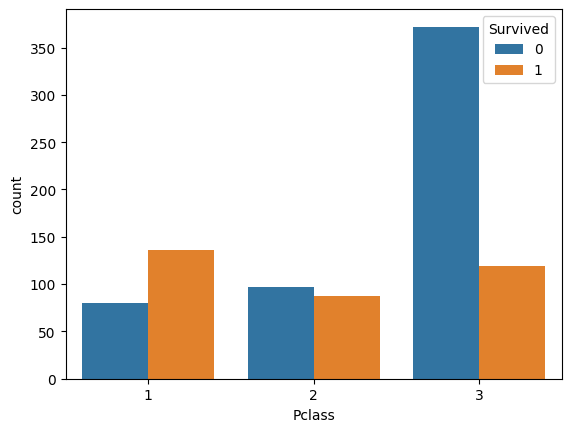

In [52]:
sns.countplot(x='Pclass', data=df, hue='Survived')
plt.show()

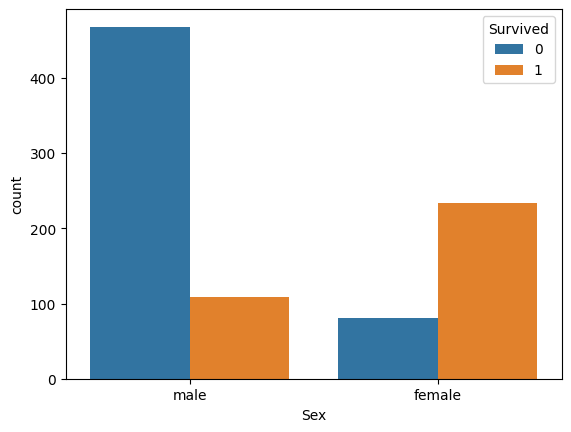

In [53]:
sns.countplot(x='Sex', data=df, hue='Survived')
plt.show()

## **Data Preprocessing**

In [54]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'])

In [55]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Along
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0


In [56]:
df['Sex'] = np.where(df['Sex'] =='male',1, 0)

In [57]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Along
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,0


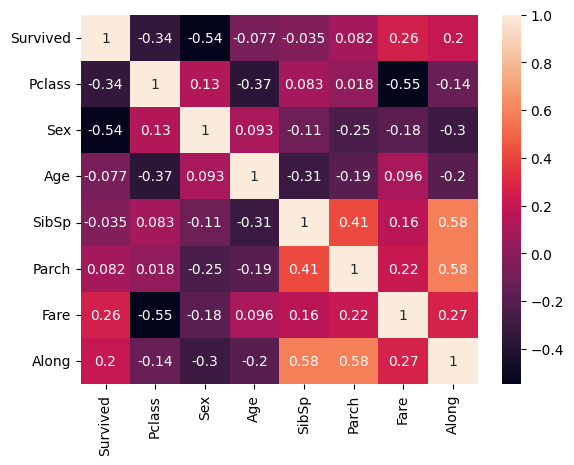

In [59]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [60]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Along,0


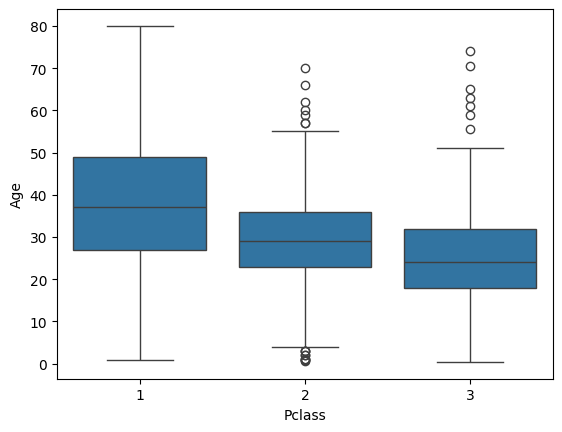

In [61]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.show()

In [62]:
df['Age'].mean()

29.69911764705882

In [66]:
df[df['Pclass']==1]['Age'].mean()

38.233440860215055

In [67]:
df[df['Pclass']==2]['Age'].mean()

29.87763005780347

In [68]:
df[df['Pclass']==3]['Age'].mean()

25.14061971830986

In [69]:
def fillAge(row):
  age = row[0]
  pclass = row[1]

  if pd.isnull(age):
    if pclass==1:
      return 38
    elif pclass==2:
      return 30
    else:
      return 25
  else:
    return age

In [70]:
df['Age'] = df[['Age', 'Pclass']].apply(fillAge, axis=1)

In [71]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Along,0


In [72]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Along
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,0


## **Decision Tree Model**

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

In [74]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [84]:
XT,Xt,yT,yt = train_test_split(X,y, test_size=0.2, random_state=0)

In [85]:
XT.shape, yT.shape, Xt.shape, yt.shape

((712, 7), (712,), (179, 7), (179,))

In [116]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [117]:
model.fit(XT, yT)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [118]:
y_pred = model.predict(Xt)

In [119]:
model.score(XT, yT)

0.8469101123595506

In [120]:
model.score(Xt, yt)

0.8212290502793296

In [122]:
f1_score(yt, y_pred)

0.7419354838709676

In [123]:
classification_report(yt, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.92      0.86       110\n           1       0.84      0.67      0.74        69\n\n    accuracy                           0.82       179\n   macro avg       0.83      0.79      0.80       179\nweighted avg       0.82      0.82      0.82       179\n'

## **The Decision Tree**

In [124]:
from sklearn import tree

In [133]:
features = X.columns
features
class_names = ['Not Survived','Survived']

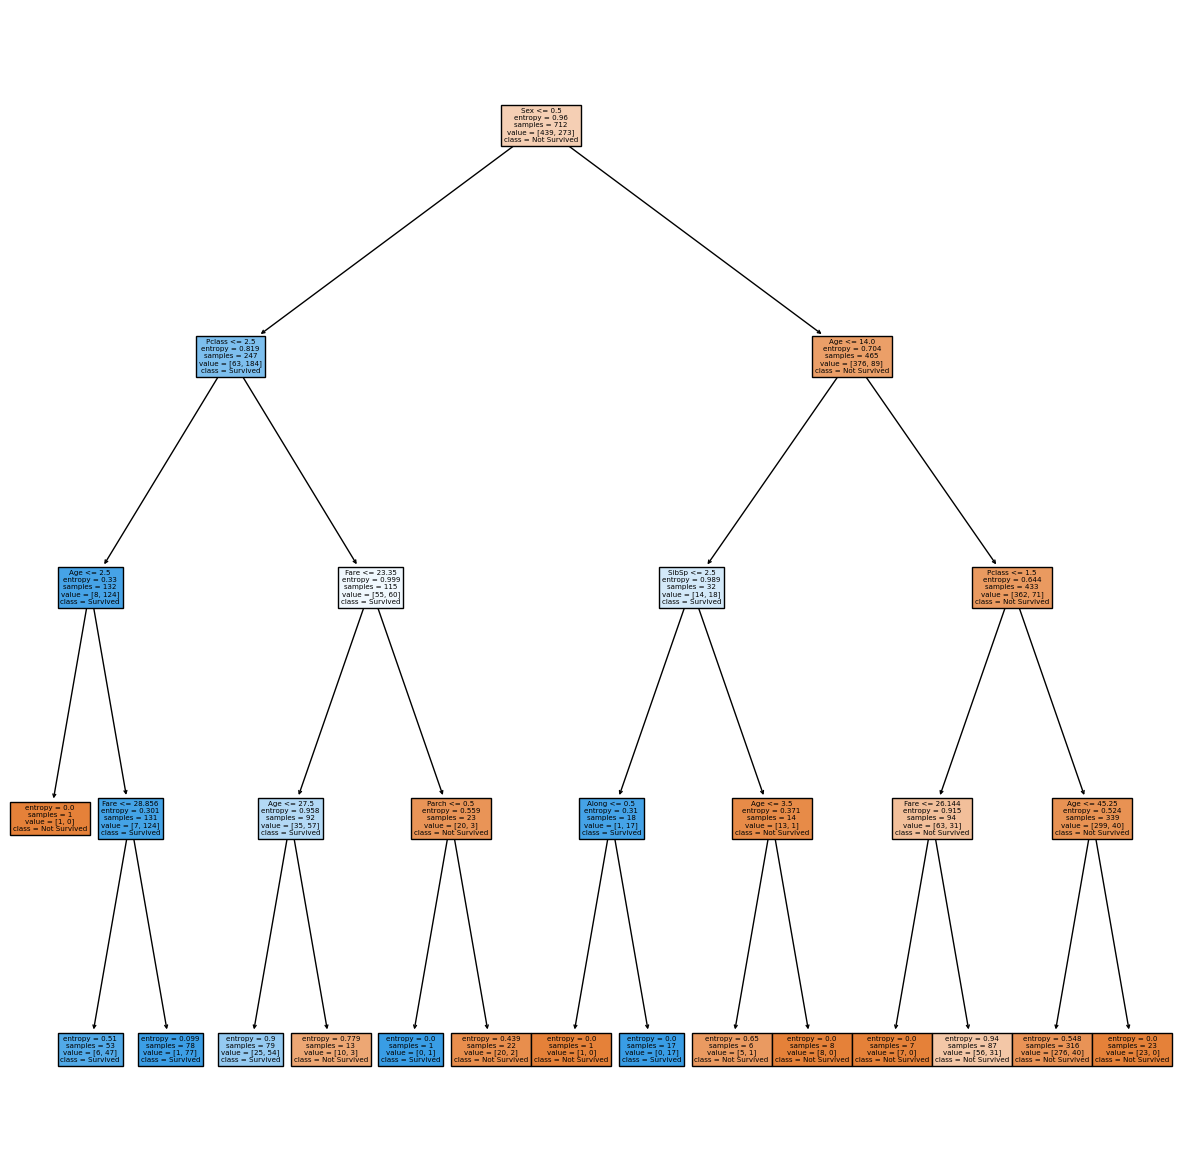

In [134]:
plt.figure(figsize=(15,15))
tree.plot_tree(model,feature_names=features, class_names=class_names, filled=True)
plt.show()